Importando bibliotecas necesarias

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Leer el conjunto de datos de entrenamiento y prueba y ver tama;o

In [4]:
train = pd.read_csv('C:/Users/monte/Desktop/tesis/train.csv')
test = pd.read_csv('C:/Users/monte/Desktop/tesis/test.csv')

print("Datos de entrenamiento cuerpo:", train.shape) 
print("Datos de prueba cuerpo:", test.shape)   

Datos de entrenamiento cuerpo: (381109, 12)
Datos de prueba cuerpo: (127037, 11)


Ver todos los datos

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Eliminar columnas innecesarias

In [4]:
train.drop(['id', 'Region_Code', 'Policy_Sales_Channel'], axis=1, inplace=True)
test.drop(['id', 'Region_Code', 'Policy_Sales_Channel'], axis=1, inplace=True)

In [8]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,39,0


Tipos de datos 

In [12]:
train.dtypes

Gender                  int32
Age                     int64
Driving_License         int64
Previously_Insured      int64
Vehicle_Age             int32
Vehicle_Damage          int32
Annual_Premium        float64
Vintage                 int64
Response                int64
dtype: object

VER SI HAY DATOS FALTANTES

In [13]:
train.isnull().sum()

Gender                0
Age                   0
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Annual_Premium        0
Vintage               0
Response              0
dtype: int64

Estadisticas descriptivas de los datos numericos

In [34]:
datosnumericos=['Age','Annual_Premium','Vintage']
print("Estadisticas descriptivas de los datos numericos:")
train[datosnumericos].describe()

Estadisticas descriptivas de los datos numericos:


,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


ESTADISTICAS DE LA VARIABLE RESPONSE

In [18]:
response_counts = train['Response'].value_counts()
response_proportions = train['Response'].value_counts(normalize=True)
print("Cantidad:\n", response_counts)
print("Proporcion:\n", response_proportions)


Cantidad:
 Response
0    334399
1     46710
Name: count, dtype: int64
Proporcion:
 Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


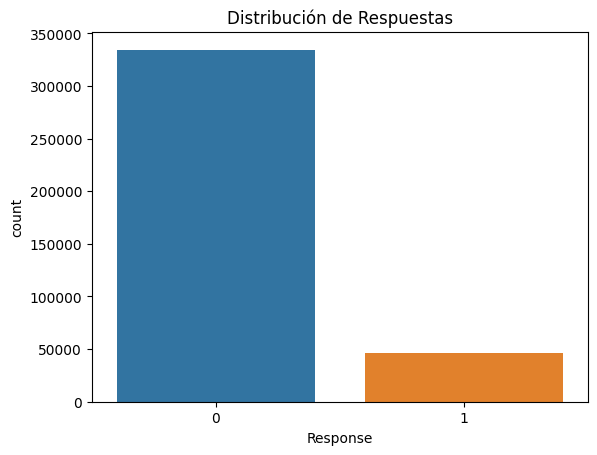

In [16]:
sns.countplot(x='Response', data=train)
plt.title('Distribución de Respuestas')
plt.show()


Relaciones entre las variables numericas con respecto a response = 1

Edad y clientes que respondieron 12

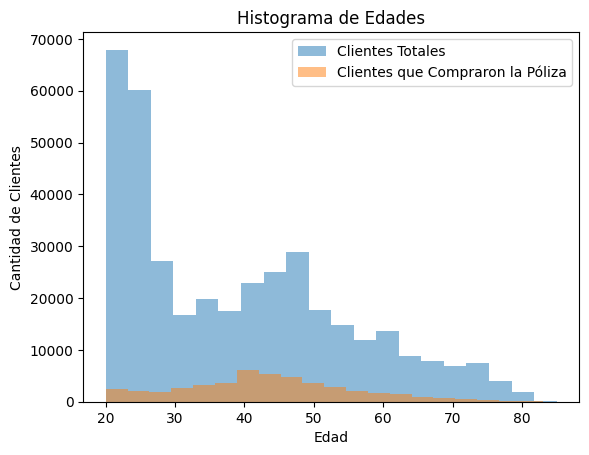

In [14]:
plt.hist(train['Age'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Age'], bins=20, alpha=0.5, label='Clientes que Compraron la Póliza')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Edades')
plt.show()


La KDE es una técnica que se utiliza para crear una versión suavizada y continua de un histograma. Imagina un histograma con barras que representan la frecuencia de los datos en diferentes intervalos o "bins". Si bien el histograma puede mostrarte una idea general de cómo se distribuyen tus datos, las barras pueden ser desiguales y hacer que sea difícil ver la forma subyacente de la distribución.

Aquí es donde entra la KDE. En lugar de contar simplemente cuántos puntos de datos caen en cada intervalo, como lo haría un histograma, la KDE coloca una pequeña curva (a menudo una curva en forma de campana como la distribución normal) en cada punto de datos individual. Luego suma todas estas pequeñas curvas para obtener una única curva suave que refleje la distribución de los datos.

La ventaja de la KDE sobre el histograma es que puedes ver una forma más suave y continua de la distribución, sin las barras bruscas y posiblemente erráticas que a veces se obtienen con los histogramas. Puede ser una representación más intuitiva y agradable estéticamente de cómo se distribuyen los datos.

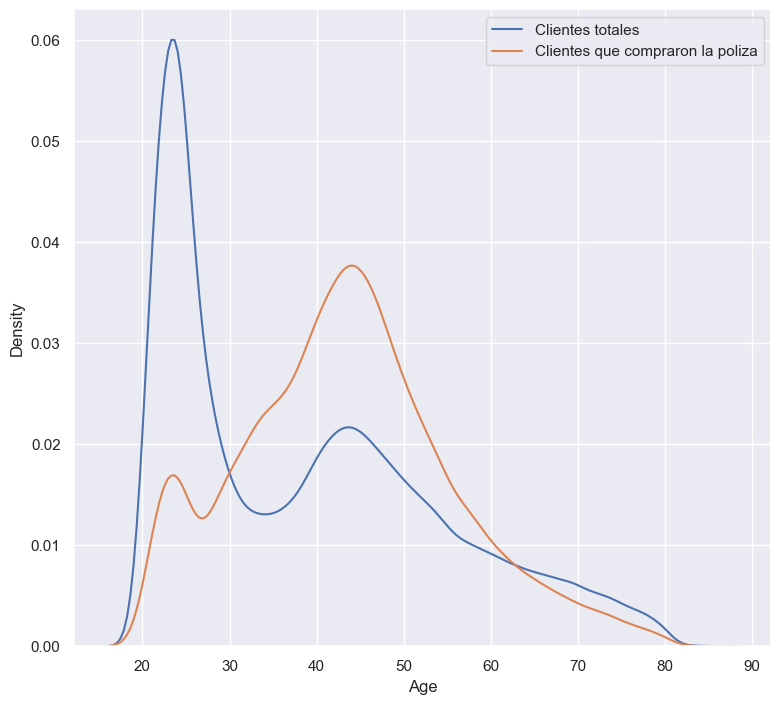

In [68]:
#Gráfico de densidad (KDE):
sns.kdeplot(train.Age, label="Clientes totales")
sns.kdeplot(train.Age[train.Response == 1], label="Clientes que compraron la poliza")
plt.legend()
plt.show()


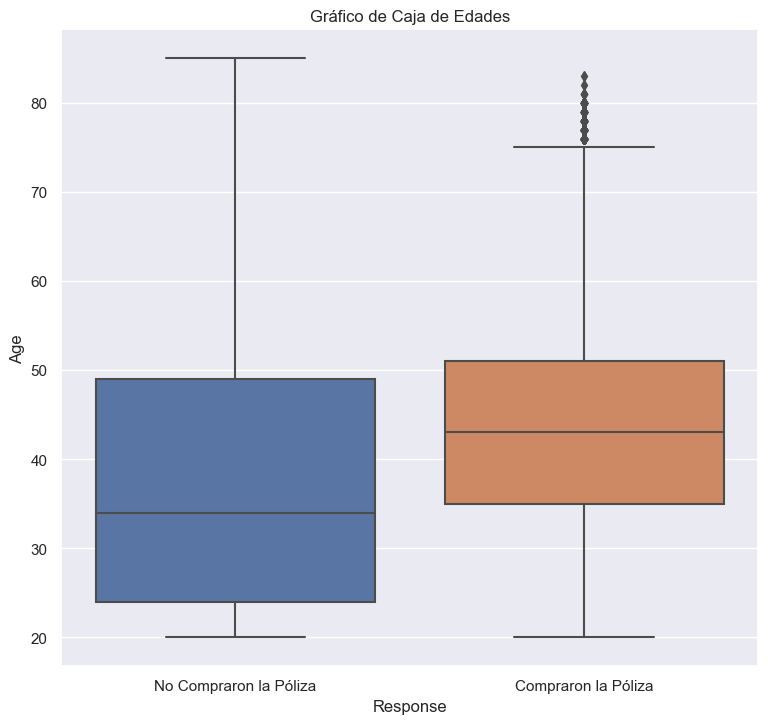

In [70]:
# Gráfico de Caja para comparar las edades de los clientes que compraron la póliza con los que no lo hicieron
sns.boxplot(x='Response', y='Age', data=train)
plt.xticks([0, 1], ['No Compraron la Póliza', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Edades')
plt.show()


anual premium y clientes que respondieron 1 

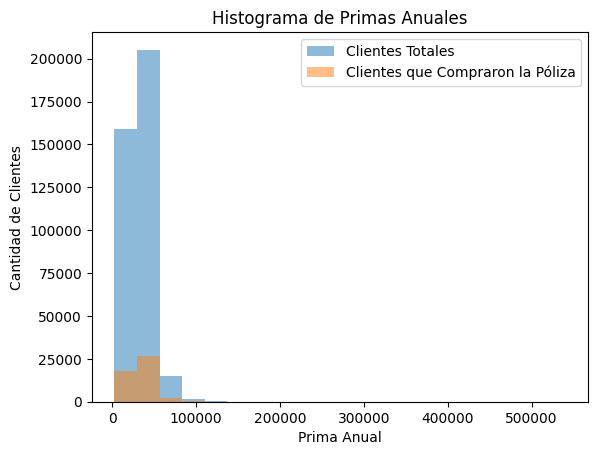

In [26]:
plt.hist(train['Annual_Premium'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Annual_Premium'], bins=20, alpha=0.5, label='Clientes que Compraron la Póliza')
plt.xlabel('Prima Anual')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Primas Anuales')
plt.show()


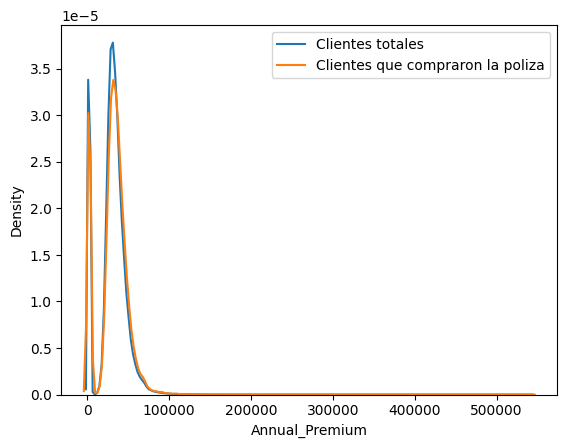

In [25]:
sns.kdeplot(train.Annual_Premium, label="Clientes totales")
sns.kdeplot(train.Annual_Premium[train.Response == 1], label="Clientes que compraron la poliza")
plt.legend()
plt.show()


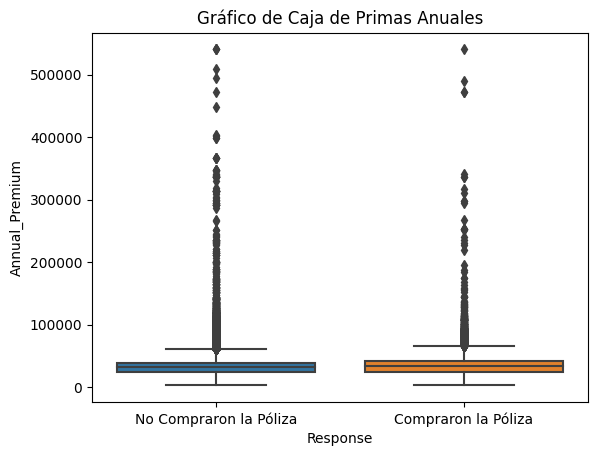

In [22]:
sns.boxplot(x='Response', y='Annual_Premium', data=train)
plt.xticks([0, 1], ['No Compraron la Póliza', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Primas Anuales')
plt.show()


Analisis
La similitud en los gráficos podría indicar que no hay una relación fuerte o evidente entre la prima anual (Annual_Premium) y la variable de respuesta (Response)

Vintage y clientes que respondieron 1 

In [ ]:
plt.hist(train['Vintage'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Vintage'], bins=20, alpha=0.5, label='Compraron la Póliza')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Antigüedad (Vintage)')
plt.show()


<Axes: xlabel='Gender', ylabel='count'>

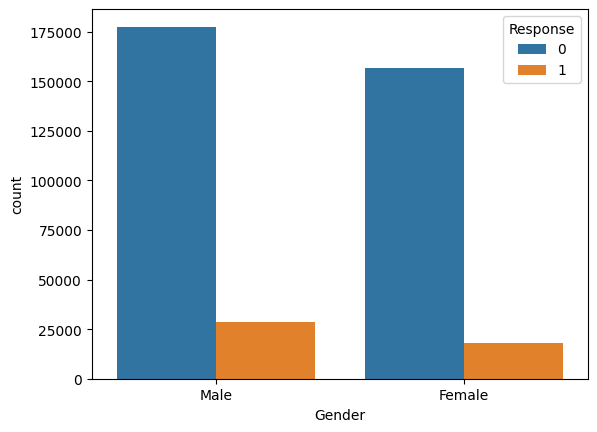

In [7]:
# Gráfico de barra
sns.countplot(x='Gender', hue='Response', data=train)

Convertir variables categóricas a numéricas

In [19]:
pd.crosstab(train['Response'], train['Gender'])


Gender,0,1
Response,,
0,156835,177564
1,18185,28525


<Axes: xlabel='Age', ylabel='Annual_Premium'>

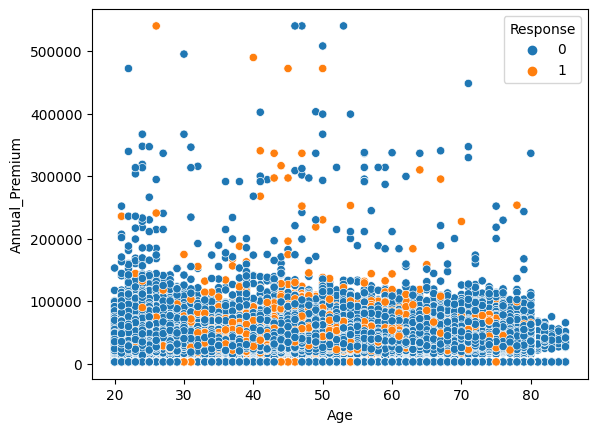

In [8]:
# Gráfico de dispersión
sns.scatterplot(x='Age', y='Annual_Premium', hue='Response', data=train)


<Axes: >

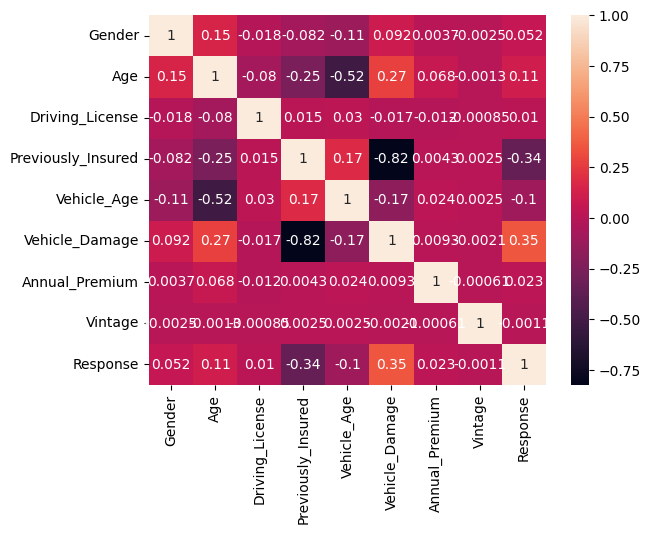

In [11]:
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True)


In [10]:
labelencoder = LabelEncoder()
train['Gender'] = labelencoder.fit_transform(train['Gender'])
train['Vehicle_Age'] = labelencoder.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = labelencoder.fit_transform(train['Vehicle_Damage'])

test['Gender'] = labelencoder.fit_transform(test['Gender'])
test['Vehicle_Age'] = labelencoder.fit_transform(test['Vehicle_Age'])
test['Vehicle_Damage'] = labelencoder.fit_transform(test['Vehicle_Damage'])

In [18]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,1,44,1,0,2,1,40454.0,217,1
1,1,76,1,0,0,0,33536.0,183,0
2,1,47,1,0,2,1,38294.0,27,1
3,1,21,1,1,1,0,28619.0,203,0
4,0,29,1,1,1,0,27496.0,39,0


In [ ]:
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
print("Estadisticas descriptivas de los datos de categorias:")
for category in categorical_columns:
    print(train[category].value_counts(), '\n______________________\n')